# 3 게임 개발

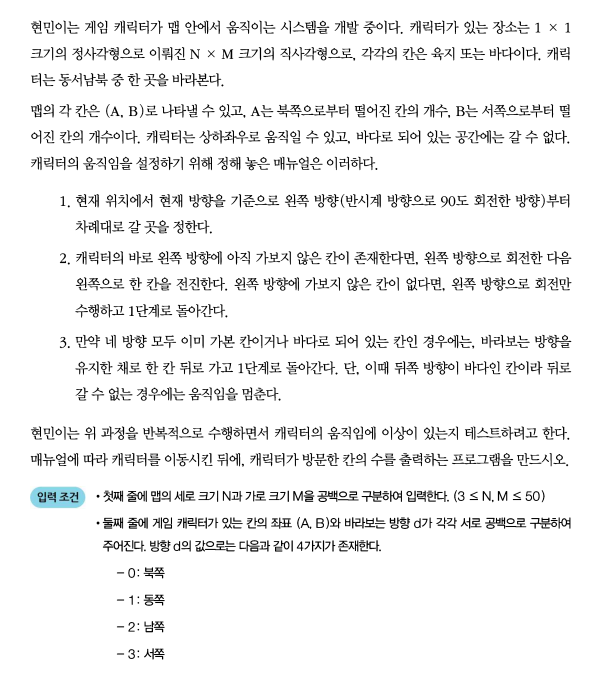

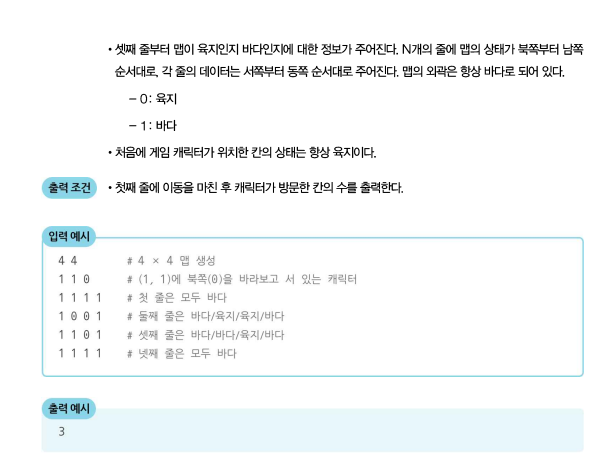

## 문제 해설
- 전형적인 시뮬레이션 문제이다.(삼성전자 공채 코딩 테스트에서 자주 출제되는 대표 유형)
- 별도의 알고리즘이 필요하기보다는 문제에서 요규하는 내용을 오류없이 성실하게 구현만 할 수 있다면 풀 수 있다는 특징이 있음.
- 다만, 문제가 길고 문제를 바르게 이해하여 소스코드로 옮기는 과정이 간단하지 않다. => 반복적인 숙달 필요!
- 문제 풀이를 위한 중요한 테크닉
    - 일반적으로 방향(Direction)을 설정해서 이동하는 문제 유형에는 dx, dy라는 별도의 리스트를 만들어 방향을 정하는 것이 효과적
    - 예) 북쪽으로 이동하기 위해 x와 y좌표를 각각 dx[0], dy[0]만큼 더한다.(현재 위치에서 (-1, 0)만큼 이동시키는 것)
- 반복문을 이용하여 모든 방향을 차례대로 확인할 수 있다는 점에서 유용함.
- 아래 답안 예시 코드에서는 리스트 컴프리헨션 문법을 사용해 2차원 리스트를 초기화 함. (파이썬에서 2차원 리스트를 선언할 때는 컴프리헨션을 이용하는 것이 효율적)
- 왼쪽으로 회전하는 함수 turn_left()에서 global 키워드를 사용했는데, 이는 정수형 변수인 direction변수가 함수 바깥에서 선언된 전역변수이기 때문이다.

### Tip
- 입력값을 예시처럼 입력했는데 에러가 난다면?
    - 예외처리를 고려하지 않고 빠르게 코드를 짜는 것이 코딩 테스트의 특징(실무에서는 예외를 고려해서 짜야 함.)
    - 그러나 예외를 고려하지 않으면 오류 발생!

In [2]:
## 답안 예시

# N, M을 공백으로 구분하여 입력받기
n, m = map(int, input().split())

# 방문한 위치를 저장하기 위한 맵을 생성하여 0으로 초기화
d = [[0] * m for _ in range(n)]
# 현재 캐릭터의 X좌표, Y좌표, 방향을 입력받기
x, y, direction = map(int, input().split())
d[x][y] = 1 # 현재 좌표 방문 처리

# 전체 맵 정보를 입력받기
array = []
for i in range(n):
    array.append(list(map(int, input().split())))

# 북, 동, 남, 서 방향 정의
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, -1]

# 왼쪽으로 회전
def turn_left():
    global direction
    direction -= 1
    if direction == -1:
        direction = 3

# 시뮬레이션 시작
count = 1
turn_time = 0
while True:
    # 왼쪽으로 회전
    turn_left()
    nx = x + dx[direction]
    ny = y + dy[direction]
    # 회전한 이후 정면에 가보지 않은 칸이 존재하는 경우 이동
    if d[nx][ny] == 0 and array[nx][ny] == 0:
        d[nx][ny] = 1
        x = nx
        y = ny
        count += 1
        turn_time = 0
        continue
    # 회전한 이후 정면에 가보지 않은 칸이 없거나 바다인 경우
    else:
        turn_time += 1
    # 네 방향 모두 갈 수 없는 경우
    if turn_time == 4:
        nx = x - dx[direction]
        ny = y - dy[direction]
        # 뒤로 갈 수 있다면 이동하기
        if array[nx][ny] == 0:
            x = nx
            y = ny
        # 뒤가 바다로 막혀있는 경우
        else:
            break
        turn_time = 0

# 정답 출력
print(count)

4 4
1 1 0
1 1 1 1
1 0 0 1
1 1 0 1
1 1 1 1
1
